<a href="https://colab.research.google.com/github/Yeow34/LifeExpectancyPrediction/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

df=pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


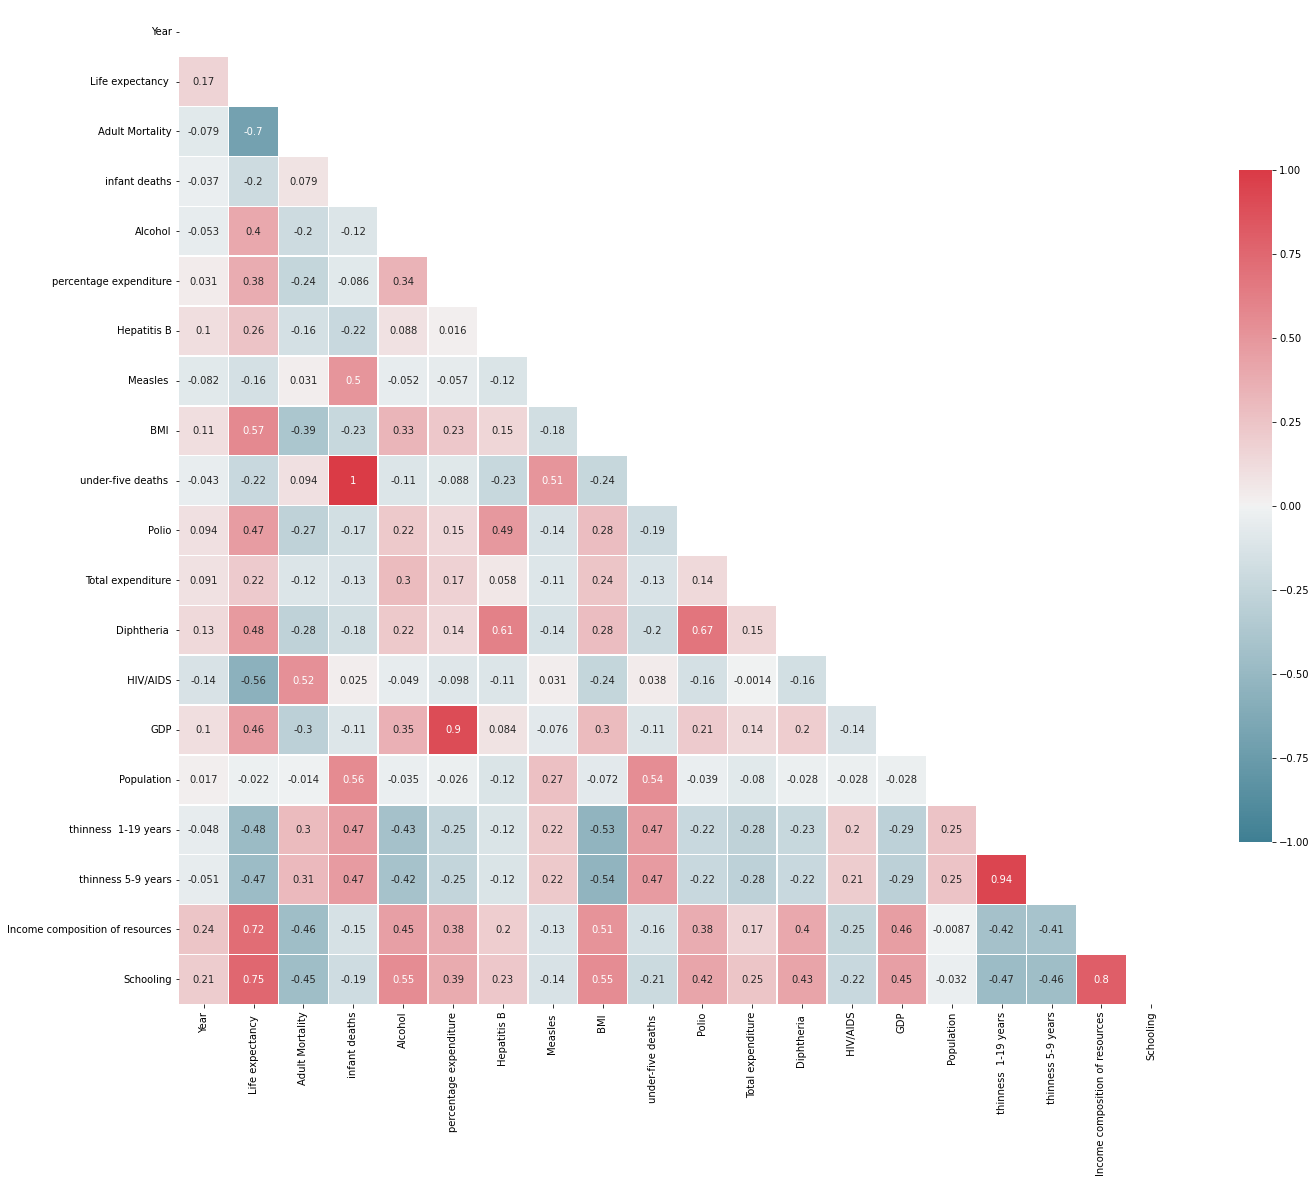

In [ ]:
import matplotlib.pyplot as plt

corr=df.corr(method='pearson')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.drop(df.columns[[0,1,2,11,16,19,21]], axis=1, inplace=True)
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,Income composition of resources
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,33736494.0,17.2,0.479
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,327582.0,17.5,0.476
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,31731688.0,17.7,0.470
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,3696958.0,17.9,0.463
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,2978599.0,18.2,0.454


In [ ]:
df=df.fillna(df.mean())
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,Income composition of resources
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,33736494.0,17.2,0.479
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,327582.0,17.5,0.476
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,31731688.0,17.7,0.470
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,3696958.0,17.9,0.463
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,2978599.0,18.2,0.454


In [ ]:
df_mean=df.mean()
df_std=df.std()
df_normalized=(df-df_mean)/df_std
df_normalized

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,Income composition of resources
0,-0.444372,0.791452,0.268778,-1.172759,-0.335513,-0.705741,-0.110366,-0.964550,-3.278080,0.925649,-0.732827,-0.323390,0.389909,2.812651,-0.725277
1,-0.980783,0.855926,0.285738,-1.172759,-0.334384,-0.838561,-0.168095,-0.989641,-1.051303,0.933981,-0.859730,-0.323390,-0.230896,2.880918,-0.739924
2,-0.980783,0.831748,0.302697,-1.172759,-0.334537,-0.750014,-0.173502,-1.014732,-0.880013,0.913150,-0.775128,-0.323390,0.352655,2.926429,-0.769218
3,-1.022854,0.863985,0.328137,-1.172759,-0.332040,-0.617194,0.032040,-1.039823,-0.665900,1.075632,-0.648225,-0.323390,-0.168287,2.971940,-0.803395
4,-1.054408,0.888163,0.345097,-1.172759,-0.367800,-0.572920,0.051748,-1.059895,-0.623077,0.804829,-0.605924,-0.323390,-0.181635,3.040207,-0.847336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,-2.621569,4.498728,-0.028017,-0.062013,-0.371370,-0.572920,-0.208296,-0.563099,-0.665900,0.496531,-0.732827,6.273976,0.000448,1.037720,-1.076806
2934,-2.600533,4.434254,-0.036497,-0.138616,-0.371370,-3.273606,-0.123970,-0.583171,-3.235257,0.242393,-0.605924,6.884478,-0.002220,1.128742,-1.023100
2935,-2.568979,-0.739815,-0.044977,-0.044139,-0.371370,-0.351552,-0.184490,-0.603244,-0.408964,0.246560,-0.479021,7.494981,-0.234651,-0.828234,-0.979159
2936,-2.516390,4.200534,-0.044977,-0.736121,-0.371370,-0.218732,-0.164869,-0.623316,-0.280496,0.092410,-0.309816,7.947934,-0.007195,-0.737212,-0.979159


In [ ]:
df_normalized=df_normalized.fillna(1)
df_normalized.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,Income composition of resources
0,-0.444372,0.791452,0.268778,-1.172759,-0.335513,-0.705741,-0.110366,-0.964550,-3.278080,0.925649,-0.732827,-0.32339,0.389909,2.812651,-0.725277
1,-0.980783,0.855926,0.285738,-1.172759,-0.334384,-0.838561,-0.168095,-0.989641,-1.051303,0.933981,-0.859730,-0.32339,-0.230896,2.880918,-0.739924
2,-0.980783,0.831748,0.302697,-1.172759,-0.334537,-0.750014,-0.173502,-1.014732,-0.880013,0.913150,-0.775128,-0.32339,0.352655,2.926429,-0.769218
3,-1.022854,0.863985,0.328137,-1.172759,-0.332040,-0.617194,0.032040,-1.039823,-0.665900,1.075632,-0.648225,-0.32339,-0.168287,2.971940,-0.803395
4,-1.054408,0.888163,0.345097,-1.172759,-0.367800,-0.572920,0.051748,-1.059895,-0.623077,0.804829,-0.605924,-0.32339,-0.181635,3.040207,-0.847336


In [ ]:
df_normalized.insert(1,"bias",1)
df_normalized.head()

,Life expectancy,bias,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,Income composition of resources
0,-0.444372,1,0.791452,0.268778,-1.172759,-0.335513,-0.705741,-0.110366,-0.964550,-3.278080,0.925649,-0.732827,-0.32339,0.389909,2.812651,-0.725277
1,-0.980783,1,0.855926,0.285738,-1.172759,-0.334384,-0.838561,-0.168095,-0.989641,-1.051303,0.933981,-0.859730,-0.32339,-0.230896,2.880918,-0.739924
2,-0.980783,1,0.831748,0.302697,-1.172759,-0.334537,-0.750014,-0.173502,-1.014732,-0.880013,0.913150,-0.775128,-0.32339,0.352655,2.926429,-0.769218
3,-1.022854,1,0.863985,0.328137,-1.172759,-0.332040,-0.617194,0.032040,-1.039823,-0.665900,1.075632,-0.648225,-0.32339,-0.168287,2.971940,-0.803395
4,-1.054408,1,0.888163,0.345097,-1.172759,-0.367800,-0.572920,0.051748,-1.059895,-0.623077,0.804829,-0.605924,-0.32339,-0.181635,3.040207,-0.847336


In [ ]:
m=len(df)
m

2938

In [ ]:
y=df.iloc[:,0]
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64

In [ ]:
X=df_normalized.iloc[:,1::]
X.head()

,bias,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,Income composition of resources
0,1,0.791452,0.268778,-1.172759,-0.335513,-0.705741,-0.110366,-0.964550,-3.278080,0.925649,-0.732827,-0.32339,0.389909,2.812651,-0.725277
1,1,0.855926,0.285738,-1.172759,-0.334384,-0.838561,-0.168095,-0.989641,-1.051303,0.933981,-0.859730,-0.32339,-0.230896,2.880918,-0.739924
2,1,0.831748,0.302697,-1.172759,-0.334537,-0.750014,-0.173502,-1.014732,-0.880013,0.913150,-0.775128,-0.32339,0.352655,2.926429,-0.769218
3,1,0.863985,0.328137,-1.172759,-0.332040,-0.617194,0.032040,-1.039823,-0.665900,1.075632,-0.648225,-0.32339,-0.168287,2.971940,-0.803395
4,1,0.888163,0.345097,-1.172759,-0.367800,-0.572920,0.051748,-1.059895,-0.623077,0.804829,-0.605924,-0.32339,-0.181635,3.040207,-0.847336


In [ ]:
X.shape

(2938, 15)

In [ ]:
y.shape

(2938,)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=40)

In [ ]:
model=LinearRegression().fit(X,y)

In [ ]:
r2=model.score(X,y)
print("The accuracy of this model is", r2*100, '%')

The accuracy of this model is 79.12215211410695 %


In [ ]:
print('intercept:',model.intercept_)
print('slope:',model.coef_)

intercept: 69.22493169398906
slope: [ 0.         -2.74380554 -0.26101038  0.65249617  0.74327612 -0.36651577
 -0.29806095  1.09920539  0.88159634  0.26358069  1.18197731 -2.40777547
  0.18384609 -0.37774921  2.73814775]


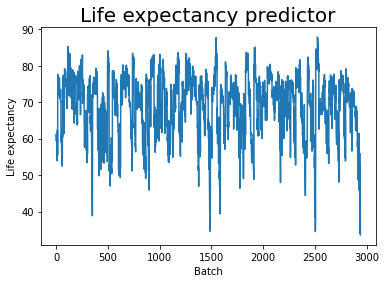

In [ ]:
plt.title('Life expectancy predictor', size=20)
plt.xlabel('Batch',size=10)
plt.ylabel("Life expectancy", size=10)
y_plot=np.dot(model.coef_,X.T)+ model.intercept_
plt.plot(y_plot)

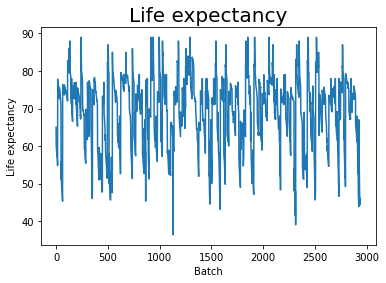

In [ ]:
plt.title('Life expectancy', size=20)
plt.xlabel('Batch',size=10)
plt.ylabel("Life expectancy", size=10)
plt.plot(y)